In [102]:
import pandas as pd

summaries = []
MODELS = ['gpt-3.5-turbo',
 'insolvency_bot_with_gpt-3.5-turbo',
 'gpt-4',
 'insolvency_bot_with_gpt-4',
 'gpt-4o',
 'insolvency_bot_with_gpt-4o',
 'gemini-2.0-pro-exp-02-05',
 'insolvency_bot_with_gemini-2.0-pro-exp-02-05',
 'claude-3-5-sonnet-20241022',
 'insolvency_bot_with_claude-3-5-sonnet-20241022',
 'deepseek-chat',
 'insolvency_bot_with_deepseek-chat',
 'llama3.1-70b',
 'insolvency_bot_with_llama3.1-70b']
DATASETS = ["train", "test"]

for MODEL in MODELS:
    if  "deepseek" in MODEL:
        continue
    for DATASET in DATASETS:
        # if "gemini" in MODEL and DATASET=="test":continue
        df = pd.read_csv(f"scores_{DATASET}_{MODEL}.csv", encoding="utf-8", sep="\t")
        
        # Drop the TOTAL row
        df = df[df.question_no != "TOTAL"]
        
        summaries.append((MODEL, DATASET, df.bot_response_time.median(),  df["bot_score"].sum(), df["max_points_available"].sum()))

In [103]:
df_summary = pd.DataFrame()
df_summary["model"] = [s[0] for s in summaries]
df_summary["dataset"] = [s[1] for s in summaries]
df_summary["median_response_time"] = [s[2] for s in summaries]
df_summary["total_score"] = [s[3] for s in summaries]
df_summary["available_score"] = [s[4] for s in summaries]

In [104]:
df_summary["percentage_score"] = df_summary.total_score / df_summary.available_score * 100

In [105]:
df_summary

,model,dataset,median_response_time,total_score,available_score,percentage_score
0,gpt-3.5-turbo,train,5.222760,53.0,298,17.785235
1,gpt-3.5-turbo,test,8.425750,60.0,296,20.270270
2,insolvency_bot_with_gpt-3.5-turbo,train,5.474656,85.0,298,28.523490
3,insolvency_bot_with_gpt-3.5-turbo,test,9.466624,87.5,296,29.560811
4,gpt-4,train,21.641649,86.5,298,29.026846
5,gpt-4,test,33.479660,61.5,296,20.777027
6,insolvency_bot_with_gpt-4,train,33.877039,107.5,298,36.073826
7,insolvency_bot_with_gpt-4,test,52.644380,139.0,296,46.959459
8,gpt-4o,train,4.615740,71.0,298,23.825503
9,gpt-4o,test,4.961722,63.0,296,21.283784


In [106]:
df_summary.to_csv("score_summary.csv", encoding="utf-8", sep="\t", index=False)

In [107]:
import numpy as np

In [108]:
import fastdatascience

In [109]:
df_summary = df_summary.iloc[::-1]

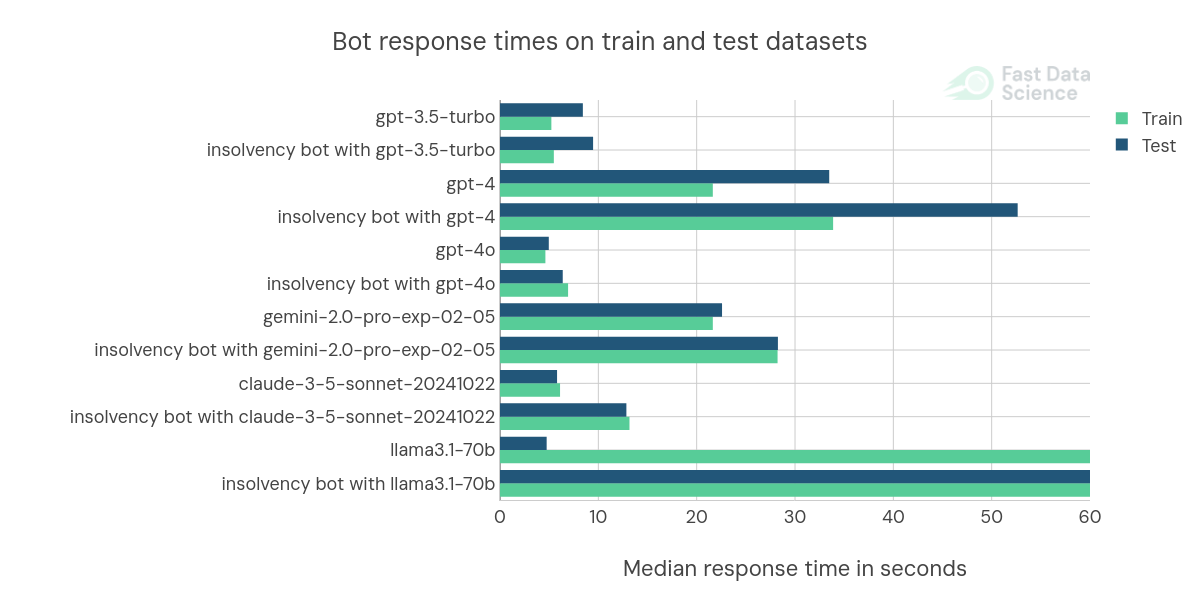

In [112]:
import re
import plotly.graph_objects as px
import numpy

fig = px.Figure(data=[px.Bar(
    name = 'Train',
    y = list(df_summary[df_summary.dataset=="train"].model.apply(lambda x : re.sub("_", " ", x))),
    x =list(df_summary[df_summary.dataset=="train"].median_response_time),
    orientation='h'
   ),
                       px.Bar(
    name = 'Test',
    y = list(df_summary[df_summary.dataset=="test"].model.apply(lambda x : re.sub("_", " ", x))),
    x =list(df_summary[df_summary.dataset=="test"].median_response_time),
                           orientation='h'
   )
])

fastdatascience.brand(fig, 0.2)


fig.update_layout(
    title="Bot response times on train and test datasets",
    margin=dict(l=500, r=100, t=100, b=100),
    xaxis_title="Median response time in seconds",
    xaxis_range = [0,60]
)

fig.show(renderer="png")
fig.write_image("bot_response_times.png") 

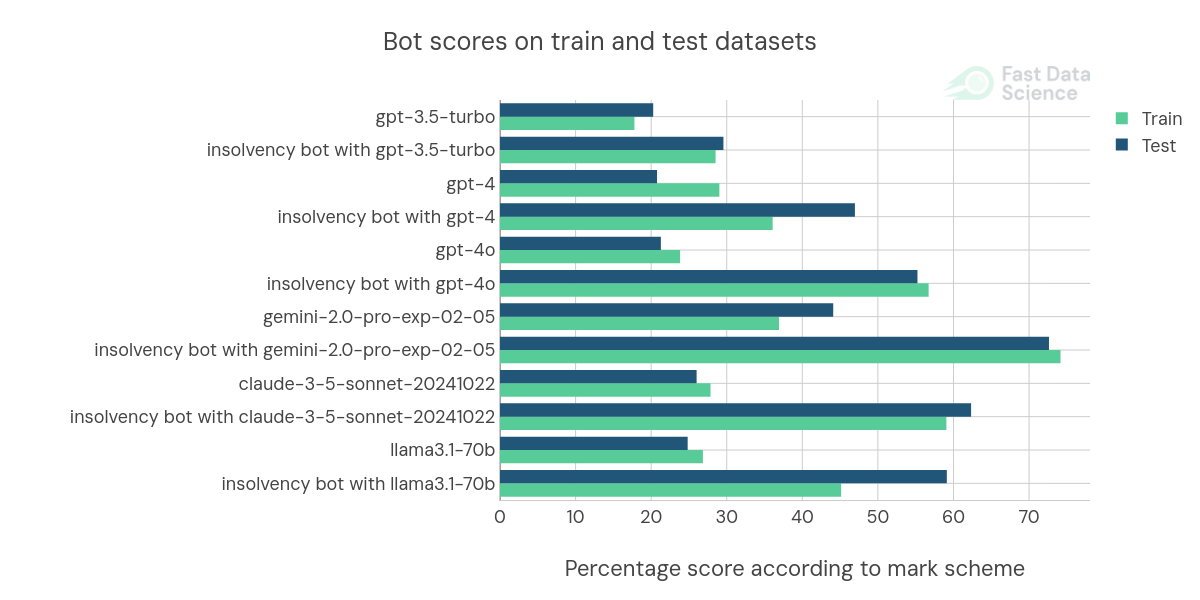

In [113]:
import re
import plotly.graph_objects as px
import numpy
 
 
 
fig = px.Figure(data=[px.Bar(
    name = 'Train',
    y = list(df_summary[df_summary.dataset=="train"].model.apply(lambda x : re.sub("_", " ", x))),
    x =list(df_summary[df_summary.dataset=="train"].percentage_score),
    orientation='h'
   ),
                       px.Bar(
    name = 'Test',
    y = list(df_summary[df_summary.dataset=="test"].model.apply(lambda x : re.sub("_", " ", x))),
    x =list(df_summary[df_summary.dataset=="test"].percentage_score),
                           orientation='h'
   )
])

fastdatascience.brand(fig, 0.2)

fig.update_layout(
    title="Bot scores on train and test datasets",
    margin=dict(l=500, r=100, t=100, b=100),
    xaxis_title="Percentage score according to mark scheme",
)

fig.show(renderer="png")
fig.write_image("bot_scores.png") 